In [1]:
# windows only hack for graphviz path 
import os
for path in os.environ['PATH'].split(os.pathsep):
    if path.endswith("Library\\bin"):
        os.environ['PATH']+=os.pathsep+os.path.join(path, 'graphviz')

In [2]:
import keras
from keras.models import Sequential
from PIL import Image
import numpy as np

Using Theano backend.
Using cuDNN version 5105 on context None
Preallocating 3224/4030 Mb (0.800000) on cuda
Mapped name None to device cuda: GeForce GTX 980 (0000:01:00.0)


In [3]:
import keras.backend as K
# 設定 channels first
K.set_image_data_format('channels_last')

In [4]:
pretrained = keras.applications.vgg16.VGG16()

In [5]:
pretrained

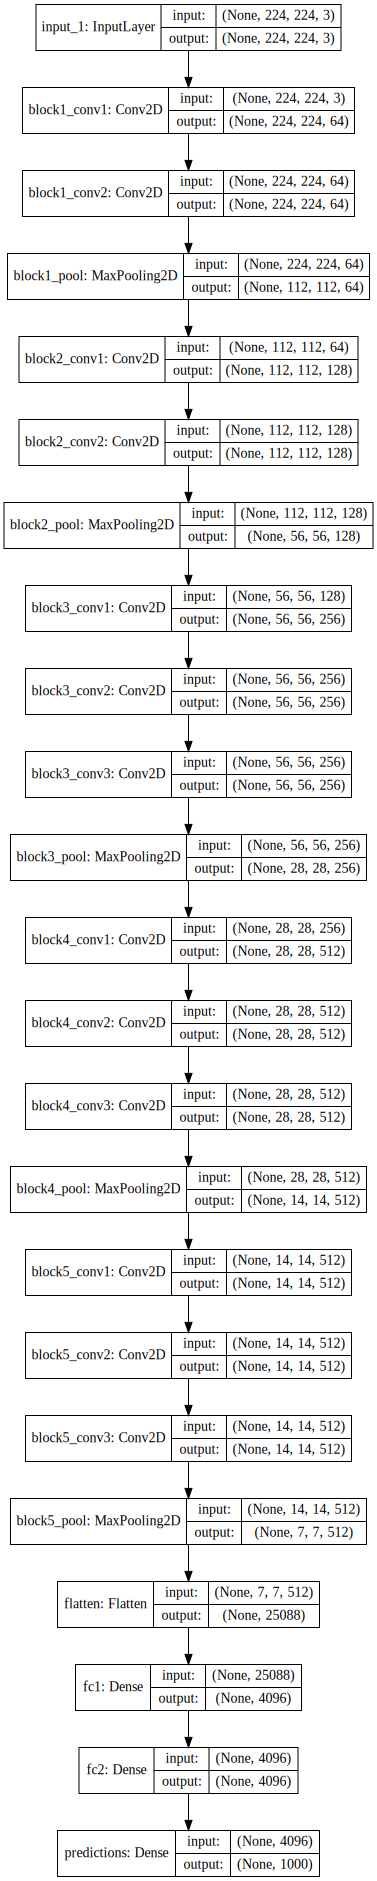

In [6]:
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(pretrained, show_shapes=True).create(prog='dot', format='svg'))

### 看一下 imagenet 的分類

In [7]:
from keras.applications import imagenet_utils

In [8]:
imagenet_utils.CLASS_INDEX_PATH

'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [9]:
from urllib.request import urlopen
import json
with urlopen(imagenet_utils.CLASS_INDEX_PATH) as jsonf:
    data = jsonf.read()

In [10]:
class_dict = json.loads(data.decode())
[class_dict[str(i)][1] for i in range(1000)]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel',
 'kite',
 'bald_eagle',
 'vulture',
 'great_grey_owl',
 'European_fire_salamander',
 'common_newt',
 'eft',
 'spotted_salamander',
 'axolotl',
 'bullfrog',
 'tree_frog',
 'tailed_frog',
 'loggerhead',
 'leatherback_turtle',
 'mud_turtle',
 'terrapin',
 'box_turtle',
 'banded_gecko',
 'common_iguana',
 'American_chameleon',
 'whiptail',
 'agama',
 'frilled_lizard',
 'alligator_lizard',
 'Gila_monster',
 'green_lizard',
 'African_chameleon',
 'Komodo_dragon',
 'African_crocodile',
 'American_alligator',
 'triceratops',
 'thunder_snake',
 'ringneck_snake',
 'hognose_snake',
 'green_snake',
 'king_snake',
 'garter_snake',
 'water_snake',
 'vine_snake',
 'night_snake',
 'boa_constrictor',
 'rock_python',
 'Indian_cobr

Imagenet 2012 網頁

http://image-net.org/challenges/LSVRC/2012/signup

資料下載

http://academictorrents.com/browse.php?search=imagenet

一千張圖片

https://www.dropbox.com/s/vippynksgd8c6qt/ILSVRC2012_val_1000.tar?dl=0

In [29]:
# 讀取圖片
from PIL import Image as pimage
from glob import glob
imgs = []
files = list(glob('ILSVRC2012_img_val/ILSVRC2012_val_*.JPEG'))
for fn in files:
    img = pimage.open(fn)
    img = np.array(img.resize((224,224)))
    if img.ndim !=3:
        continue
    imgs.append(img[:,:,:3])
imgs = imgs

In [30]:
# 準備資料，轉成通用的格式(扣掉顏色的中間值)
p_imgs = imagenet_utils.preprocess_input(np.float32(imgs))
del imgs

In [31]:
# 實際
predictions = vgg16.predict(p_imgs)

In [32]:
results = imagenet_utils.decode_predictions(predictions)

In [33]:
from IPython.display import Image, HTML, display
for fn, res in zip(files[:100], results[:100]):
    res_text = "".join("<li>{:05.2f}% : {}</li>".format(x[2]*100, x[1]) for x in res)
    display(HTML("""
    <table><tr>
    <td><img width=200 src="{}" /></td>
    <td><ul>{}</ul></td>
    </tr>
    </table>
    """.format(fn, res_text)))    

,90.82% : Angora04.82% : Persian_cat01.29% : Maltese_dog00.94% : Pekinese00.74% : hamster


,99.22% : barracouta00.77% : tench00.01% : gar00.00% : reel00.00% : puffer


,62.14% : marmoset20.75% : black-footed_ferret07.51% : polecat03.50% : weasel01.80% : squirrel_monkey


,91.80% : modem01.65% : switch00.84% : space_heater00.59% : remote_control00.59% : iron


,98.75% : aircraft_carrier00.40% : warplane00.28% : projectile00.24% : missile00.15% : tank


,97.27% : nipple02.48% : oxygen_mask00.04% : water_bottle00.04% : bubble00.01% : Petri_dish


,69.99% : sea_slug11.07% : jellyfish05.30% : conch04.57% : sea_anemone02.29% : flatworm


,66.32% : kite15.12% : great_grey_owl09.93% : vulture05.85% : bald_eagle00.65% : hornbill


,14.48% : bighorn13.10% : vizsla10.96% : Chesapeake_Bay_retriever08.90% : dingo08.78% : Irish_terrier


,98.66% : organ00.58% : palace00.28% : church00.21% : altar00.09% : vault


,56.41% : bobsled09.53% : snowplow04.45% : snowmobile03.71% : ski02.22% : chain_saw


,44.91% : aircraft_carrier39.98% : warplane04.01% : wing02.36% : wreck02.19% : submarine


,99.51% : Persian_cat00.18% : tabby00.10% : tiger_cat00.07% : lynx00.04% : chow


,42.29% : plate10.32% : hotdog09.35% : guacamole08.60% : potpie07.78% : acorn_squash


,99.83% : cab00.05% : sports_car00.02% : tow_truck00.01% : racer00.01% : car_wheel


,99.97% : bee_eater00.03% : goldfinch00.01% : bulbul00.00% : macaw00.00% : lorikeet


,18.84% : dragonfly13.57% : acorn10.11% : weevil07.96% : nematode05.76% : ant


,82.95% : breastplate12.23% : cuirass01.46% : shield01.05% : caldron00.64% : pitcher


,50.52% : restaurant27.73% : barbershop12.61% : barber_chair01.96% : toyshop01.55% : tobacco_shop


,99.99% : carousel00.00% : toyshop00.00% : slot00.00% : confectionery00.00% : swing


,95.46% : jack-o'-lantern03.09% : digital_clock00.16% : traffic_light00.11% : stove00.09% : lampshade


,20.24% : sax14.31% : harp10.26% : accordion06.16% : suit05.81% : flute


,27.34% : fur_coat23.08% : barracouta15.46% : butcher_shop09.51% : stole06.88% : coho


,15.22% : scale03.69% : barber_chair03.49% : sewing_machine03.45% : barbershop02.17% : ashcan


,97.80% : crane00.59% : dock00.27% : missile00.13% : tank00.13% : projectile


,99.72% : bittern00.08% : limpkin00.07% : ruffed_grouse00.04% : partridge00.03% : dowitcher


,99.24% : viaduct00.49% : steel_arch_bridge00.12% : dam00.08% : pier00.04% : suspension_bridge


,40.42% : water_buffalo13.92% : African_elephant11.31% : American_black_bear06.89% : Newfoundland05.41% : Indian_elephant


,99.94% : gyromitra00.04% : hen-of-the-woods00.01% : coral_fungus00.01% : stinkhorn00.00% : hen


,51.99% : Siberian_husky34.24% : Eskimo_dog13.07% : malamute00.58% : Norwegian_elkhound00.05% : dogsled


,99.82% : rocking_chair00.10% : turnstile00.01% : worm_fence00.01% : folding_chair00.01% : park_bench


,46.72% : sandal33.48% : whistle14.46% : iron00.79% : muzzle00.78% : clog


,96.11% : radiator01.16% : matchstick00.52% : space_heater00.48% : spatula00.31% : plate_rack


,91.13% : cab05.01% : school_bus00.74% : limousine00.49% : minibus00.37% : beach_wagon


,99.60% : washer00.22% : microwave00.10% : dishwasher00.03% : stove00.01% : loudspeaker


,68.30% : garden_spider10.89% : tick10.06% : barn_spider07.99% : weevil01.26% : spider_web


,36.29% : Shetland_sheepdog24.98% : Border_collie19.93% : collie08.13% : Old_English_sheepdog04.51% : Newfoundland


,50.72% : otter10.94% : terrapin05.04% : sea_lion04.97% : soft-coated_wheaten_terrier03.67% : ice_bear


,98.19% : English_setter00.85% : Scottish_deerhound00.36% : Irish_wolfhound00.26% : German_short-haired_pointer00.07% : bluetick


,51.72% : barbershop38.97% : barber_chair04.86% : restaurant01.16% : library00.50% : bakery


,89.13% : Cardigan05.09% : Border_collie01.24% : collie00.71% : soccer_ball00.39% : American_Staffordshire_terrier


,77.85% : English_setter07.47% : Brittany_spaniel05.50% : borzoi04.61% : Ibizan_hound01.64% : Saluki


,99.99% : pinwheel00.00% : hair_slide00.00% : pillow00.00% : envelope00.00% : Christmas_stocking


,99.93% : gondola00.06% : canoe00.00% : paddle00.00% : boathouse00.00% : lifeboat


,40.76% : miniature_poodle17.92% : toy_poodle12.85% : Norwich_terrier09.37% : Norfolk_terrier08.83% : Dandie_Dinmont


,72.43% : mashed_potato13.62% : dough13.16% : ice_cream00.41% : trifle00.20% : mixing_bowl


,55.93% : collie42.91% : Shetland_sheepdog00.56% : borzoi00.05% : Afghan_hound00.04% : Border_collie


,99.43% : llama00.24% : Afghan_hound00.13% : wallaby00.04% : Arabian_camel00.03% : malinois


,31.65% : cassette15.19% : tape_player15.14% : jigsaw_puzzle08.07% : cassette_player07.95% : rule


,06.26% : cinema05.61% : thatch04.14% : pier03.98% : picket_fence03.18% : shopping_cart


,99.46% : gas_pump00.42% : cash_machine00.07% : vending_machine00.01% : file00.01% : ambulance


,99.82% : planetarium00.16% : dome00.02% : mosque00.00% : greenhouse00.00% : palace


,37.99% : altar11.05% : vestment05.97% : toyshop04.48% : stupa03.83% : water_bottle


,99.51% : bottlecap00.28% : pill_bottle00.06% : face_powder00.05% : puck00.04% : lotion


,99.98% : switch00.00% : dial_telephone00.00% : remote_control00.00% : soap_dispenser00.00% : cash_machine


,99.64% : chow00.26% : Pomeranian00.06% : Tibetan_mastiff00.03% : keeshond00.01% : Pekinese


,87.13% : white_stork02.56% : redshank02.18% : vulture01.02% : black_stork00.75% : magpie


,35.64% : bassinet23.39% : cradle22.88% : diaper07.15% : paper_towel02.18% : toilet_tissue


,97.20% : yurt00.52% : ashcan00.41% : barn00.26% : mountain_tent00.15% : boathouse


,67.33% : French_loaf17.58% : dough06.39% : potpie04.93% : frying_pan01.51% : Dutch_oven


,100.00% : space_shuttle00.00% : missile00.00% : projectile00.00% : drilling_platform00.00% : obelisk


,68.58% : Newfoundland18.01% : Bouvier_des_Flandres08.14% : briard02.02% : giant_schnauzer00.66% : Tibetan_terrier


,24.45% : dung_beetle18.40% : mushroom16.36% : nail07.49% : sea_urchin06.78% : bolete


,60.30% : brambling30.09% : junco05.42% : goldfinch01.33% : bulbul00.67% : ruddy_turnstone


,99.36% : crane00.27% : radio00.14% : radio_telescope00.12% : hook00.07% : drilling_platform


,84.77% : common_newt08.59% : starfish02.29% : sea_cucumber01.32% : eft00.67% : sturgeon


,40.76% : bakery23.02% : restaurant12.12% : tobacco_shop10.22% : barbershop04.06% : bookshop


,85.71% : tusker13.37% : Indian_elephant00.91% : African_elephant00.00% : triceratops00.00% : water_buffalo


,99.36% : plane00.38% : lumbermill00.04% : mortar00.02% : guillotine00.02% : hammer


,37.71% : computer_keyboard13.00% : crossword_puzzle11.84% : laptop04.23% : abacus02.46% : menu


,64.85% : Siberian_husky31.19% : Eskimo_dog03.47% : malamute00.13% : timber_wolf00.07% : Pembroke


,91.55% : electric_guitar02.88% : acoustic_guitar01.21% : stage00.88% : accordion00.74% : microphone


,43.50% : streetcar40.14% : trolleybus08.70% : passenger_car06.05% : minibus00.92% : electric_locomotive


,83.74% : black_grouse15.96% : coucal00.15% : ptarmigan00.04% : ruffed_grouse00.04% : vulture


,50.64% : otterhound41.17% : Airedale03.13% : Lakeland_terrier01.61% : Irish_wolfhound01.11% : wire-haired_fox_terrier


,29.75% : plate25.83% : ice_cream10.60% : meat_loaf09.24% : burrito08.08% : cheeseburger


,89.89% : tarantula06.44% : wolf_spider02.19% : rock_crab00.55% : axolotl00.32% : scorpion


,68.39% : grille14.35% : convertible07.54% : beach_wagon03.76% : pickup02.87% : cab


,20.59% : tailed_frog13.69% : wolf_spider10.27% : spotted_salamander07.22% : common_newt06.35% : European_fire_salamander


,77.77% : bobsled15.12% : ski04.76% : dogsled01.43% : alp00.60% : snowmobile


,100.00% : viaduct00.00% : pier00.00% : steel_arch_bridge00.00% : dam00.00% : lakeside


,99.89% : drake00.06% : American_coot00.03% : red-breasted_merganser00.01% : goose00.01% : lakeside


,49.89% : hammerhead29.90% : great_white_shark15.64% : tiger_shark01.37% : electric_ray00.58% : dugong


,36.57% : gorilla15.51% : colobus08.49% : spider_monkey07.29% : siamang07.06% : chimpanzee


,95.67% : jellyfish02.24% : electric_ray01.02% : stingray00.85% : conch00.05% : flatworm


,99.42% : bittern00.20% : bustard00.12% : hummingbird00.05% : coucal00.04% : bee_eater


,89.48% : ocarina03.69% : stage01.44% : panpipe00.79% : accordion00.78% : harmonica


,53.82% : fountain_pen24.23% : ballpoint17.18% : rubber_eraser01.65% : screwdriver01.04% : paintbrush


,98.27% : mosque00.95% : dome00.28% : palace00.17% : obelisk00.14% : monastery


,11.21% : cliff10.05% : groom09.10% : seashore08.00% : bikini05.85% : sandbar


,94.50% : porcupine02.57% : echidna00.83% : skunk00.62% : badger00.36% : marmoset


,98.21% : cash_machine01.03% : pay-phone00.41% : vending_machine00.12% : slot00.04% : television


,37.41% : tennis_ball08.94% : bath_towel07.74% : paper_towel07.30% : toilet_tissue04.98% : hotdog


,45.21% : dogsled12.64% : kelpie08.56% : groenendael06.11% : collie05.85% : Eskimo_dog


,96.94% : sea_urchin01.62% : sea_anemone00.58% : coral_reef00.27% : sea_slug00.19% : chiton


,28.05% : remote_control27.96% : cellular_telephone10.10% : pay-phone06.36% : radio04.04% : iPod


,99.98% : puck00.02% : ski00.00% : broom00.00% : knee_pad00.00% : parachute


,99.58% : whiptail00.26% : alligator_lizard00.08% : agama00.06% : banded_gecko00.01% : common_newt


,82.98% : cucumber13.88% : zucchini01.33% : corn01.27% : ear00.10% : bell_pepper


,80.43% : bullet_train04.48% : trimaran02.42% : submarine01.33% : shopping_cart00.86% : liner


In [ ]:
# 載入 mnist
import gzip
import pickle
with gzip.open("../Week02/mnist.pkl.gz", 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
train_X, train_y = train_set
validation_X, validation_y = validation_set
test_X, test_y = test_set


train_Y = np.eye(10)[train_y]
test_Y = np.eye(10)[test_y]
validation_Y = np.eye(10)[validation_y]

# or
# from keras.datasets import mnist
# from keras.utils import np_utils
# (train_X, train_y), (test_X, test_y) = mnist.load_data()
# train_Y = np_utils.to_categorical(train_y, 10)
# test_Y = np_utils.to_categorical(test_y, 10)